# Quizz 9

1. El conjunto de datos MNIST se compone de imágenes numéricas escritas en cursiva del 0 al 9. Si quieres crear una red neuronal que clasifique los datos, ¿cuál es la función de activación de la última capa totalmente conectada (=dense)?

A: La función de activación a ocupar sería **softmax** debido a que convierte las salidas en probabilidades, asignando a cada clase (0 a 9) un valor entre 0 y 1, y la suma total de las probabilidades es 1.

---

2. La presión arterial, la altura y el peso forman los vectores de características. El conjunto de capacitación es el siguiente.

```
(121, 1.72, 69.0), (140, 1.62, 63.3), (120, 1.70, 59.0), (131, 1.82, 82.0), (101, 1.78, 73.5)
```







  1. Suponiendo que el vector de pesos del perceptrón sea `(-0.01, 0.5, -0.23)`$^T$ y el sesgo es 0, explique el problema de escala con el conjunto de capacitación.
  
  A:  
  - Para la presión arterial: el coeficiente -0.01 multiplicado por un valor de alrededor de 120 produce contribuciones del orden de -1 o -2.
  - Para la altura: el coeficiente 0.5 con valores cercanos a 1.7 produce contribuciones del orden 0.8 o 0.9.
  - Para el peso: el coeficiente -0.23 con valores en el rango de 60-80 produce contribuciones que pueden superar fácilmente los 10 en valor absoluto

  2. Escriba el conjunto de capacitación que resulta tras la aplicación de la fórmula de preprocesamiento siguiente.

  $$
      x_{i}^{new} = \frac{x_{i}^{old} - \mu_{i}}{σ_{i}} \cdot (5.9)
  $$


In [3]:
import numpy as np

# Conjunto de capacitación original: [Presión arterial, Altura, Peso]
data = np.array([
    [121, 1.72, 69.0],
    [140, 1.62, 63.3],
    [120, 1.70, 59.0],
    [131, 1.82, 82.0],
    [101, 1.78, 73.5]
])

# Calcular la media (μ) y la desviación estándar (σ) para cada característica (columna)
mu = np.mean(data, axis=0)
sigma = np.std(data, axis=0)

# Aplicar la fórmula de preprocesamiento: x_new = ((x_old - μ) / σ) * 5.9
data_transformed = (data - mu) / sigma * 5.9

# Imprimir resultados
print("Media de cada característica:", mu)
print("Desviación estándar de cada característica:", sigma)
print("\nConjunto de capacitación transformado:")
print(data_transformed)

Media de cada característica: [122.6     1.728  69.36 ]
Desviación estándar de cada característica: [13.03226765  0.0688186   8.01363837]

Conjunto de capacitación transformado:
[[-0.7243559  -0.68586107 -0.26504815]
 [ 7.87737045 -9.25912443 -4.4616438 ]
 [-1.17707834 -2.40051374 -7.62749667]
 [ 3.80286849  7.88740229  9.30613493]
 [-9.77880469  4.45809695  3.04805369]]


  3. Explique su observación sobre si este preprocesamiento de datos alivia el problema de la escala.


A: Después de este preprocesamiento, las tres características se encuentran en una escala similar. Esto evita que una característica domine la función de activación por tener una magnitud mayor.

---

3. En las redes neuronales, las capas de convolución se repiten varias veces en el aprendizaje profundo, lo que provoca que algunos nodos se omitan en gran medida. Qué técnica puedes utilizar para evitar este problema?

A: La técnica recomendada es *skip connections*. Estas conexiones permiten que la información se transfiera directamente a través de varias capas sin pasar únicamente por las operaciones convolucionales sucesivas, lo que ayuda a evitar la pérdida de información y el problema del gradiente desvanecido en redes muy profundas.

Otra opción posible es hacer uso de Dropout para apagar directamente partes de las capas de la red neuronal para ajustar pesos y evitar el sobreajuste.

---

4. La inicialización del peso debe generar números aleatorios en el rango [-1,1]. Por favor, proporcione el código Python que realiza esta función.

In [4]:
import numpy as np

def initialize_weights(shape):
    """
    Inicializa un array de pesos con valores aleatorios en el rango [-1, 1].

    Parámetros:
    shape (tuple): Dimensiones del array de pesos.

    Retorna:
    numpy.ndarray: Array con pesos inicializados.
    """
    return np.random.uniform(-1, 1, shape)

# Ejemplo de uso: inicializar pesos para una capa densa con 5 entradas y 10 salidas.
weights = initialize_weights((5, 10))
print(weights)

[[-0.1941113   0.19752756  0.03823591 -0.86996237 -0.60372062 -0.53297329
  -0.62326297  0.0467034  -0.83994298 -0.2560308 ]
 [-0.83401316  0.25986339  0.17431985  0.45485075 -0.02986739  0.81246597
   0.66065474 -0.19052687  0.35106663  0.12695034]
 [-0.97897999 -0.30352881 -0.31197964  0.58658843  0.51762118  0.93412151
   0.44493819 -0.38642769 -0.28397296  0.44874516]
 [ 0.62448914 -0.42516085 -0.64526183 -0.79553654 -0.93492793  0.09723791
  -0.20839669  0.95675864 -0.78253368 -0.64414778]
 [ 0.54176841 -0.80355938  0.5400076  -0.32992664 -0.41233882  0.26550596
   0.06722388 -0.22289939 -0.77712734 -0.786049  ]]


---

5. Se desea capacitar a un clasificador cuando se tienen muchos datos de capacitación sin etiquetar, pero sólo unos pocos miles de datos etiquetados. Describe cómo puede ser útil el autoencoder y cómo trabajar.

A: Una vez que el autoencoder ha sido entrenado con los datos sin etiquetar, se puede utilizar la parte del encoder para extraer características relevantes de los datos. Posteriormente, estas características se pueden alimentar a un clasificador, que se entrenará usando los pocos miles de datos etiquetados disponibles. Este enfoque se conoce como aprendizaje semi-supervisado y permite aprovechar el conocimiento aprendido de los datos sin etiquetar para mejorar el desempeño del clasificador con datos limitados etiquetados.

---

6. Forme el modelo de clasificación del conjunto de datos “Fashion-mnist” con referencia al código siguiente.

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.fashion_mnist import load_data

# Cargar datos
(x_train, y_train), (x_test, y_test) = load_data()

# Procesamiento de datos
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Parámetros de capacitación
batch_size = 8
n_epochs = 20
learn_rate = 0.0001

# Definición del modelo
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 clases para Fashion-MNIST
])

# Compilación del modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Visualización de la arquitectura del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    validation_data=(x_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7297 - loss: 0.7922 - val_accuracy: 0.8429 - val_loss: 0.4340
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8533 - loss: 0.4109 - val_accuracy: 0.8623 - val_loss: 0.3868
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8745 - loss: 0.3552 - val_accuracy: 0.8752 - val_loss: 0.3493
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8876 - loss: 0.3158 - val_accuracy: 0.8855 - val_loss: 0.3177
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8917 - loss: 0.2943 - val_accuracy: 0.8839 - val_loss: 0.3176
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9004 - loss: 0.2725 - val_accuracy: 0.8930 - val_loss: 0.2973
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9122 - loss: 0.2510 - val_accuracy: 0.8937 - val_loss: 0.2927
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9126 - loss: 0

In [6]:
# Obtener las predicciones del modelo para el conjunto de prueba
predicciones = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [7]:
# Obtener la clase predicha para cada ejemplo en el conjunto de prueba
clases_predichas = np.argmax(predicciones, axis=1)


In [8]:
# Nombres de las clases en Fashion-MNIST
nombres_clases = ['Camiseta/Top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
                  'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botín']


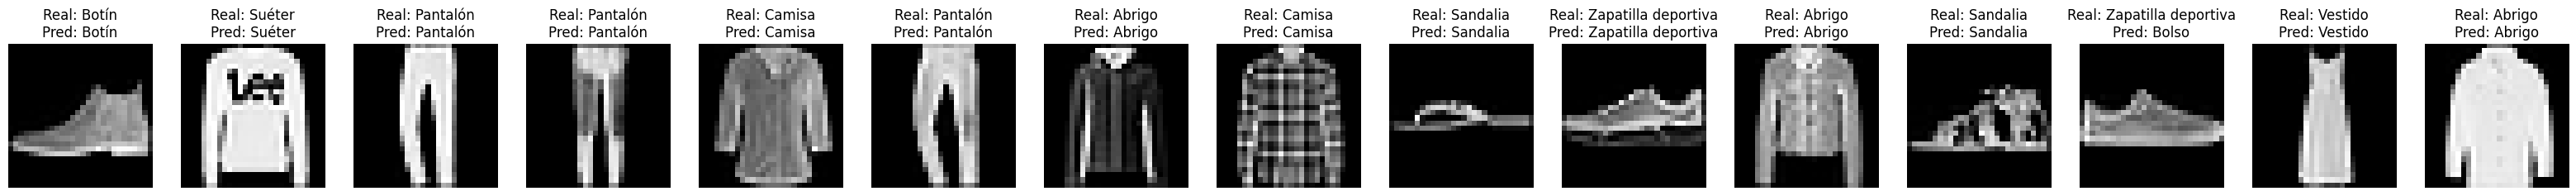

In [13]:
import matplotlib.pyplot as plt

# Número de imágenes a mostrar
num_imagenes = 15

plt.figure(figsize=(40, 30))
for i in range(num_imagenes):
    plt.subplot(1, num_imagenes, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {nombres_clases[y_test[i]]}\nPred: {nombres_clases[clases_predichas[i]]}")
    plt.axis('off')
plt.show()
